In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import matplotlib.dates as mdates

In [46]:
songs_path = "data/spotify_songs.csv"
song_data = pd.read_csv(songs_path)
date_filtered_df = song_data.loc[song_data["track_album_release_date"].str.len() > 9]
cleaned_song_data = date_filtered_df.dropna()
cleaned_song_data['track_album_release_date'] = pd.to_datetime(cleaned_song_data['track_album_release_date'])
cleaned_song_data = cleaned_song_data.loc[(cleaned_song_data["track_album_release_date"] >= "2010-01-01") & (cleaned_song_data["track_album_release_date"] < "2020-01-01")]
cleaned_track_data = cleaned_song_data.drop_duplicates(subset =['track_id'])
cleaned_trackid_data = cleaned_song_data.drop_duplicates(subset=['track_name', 'track_artist'], keep = False)

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_13412\3100282023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_song_data['track_album_release_date'] = pd.to_datetime(cleaned_song_data['track_album_release_date'])


In [47]:
cleaned_trackid_data['playlist_genre'].value_counts()

playlist_genre
edm      3875
rap      3303
pop      2835
latin    2592
r&b      2283
rock     1158
Name: count, dtype: int64

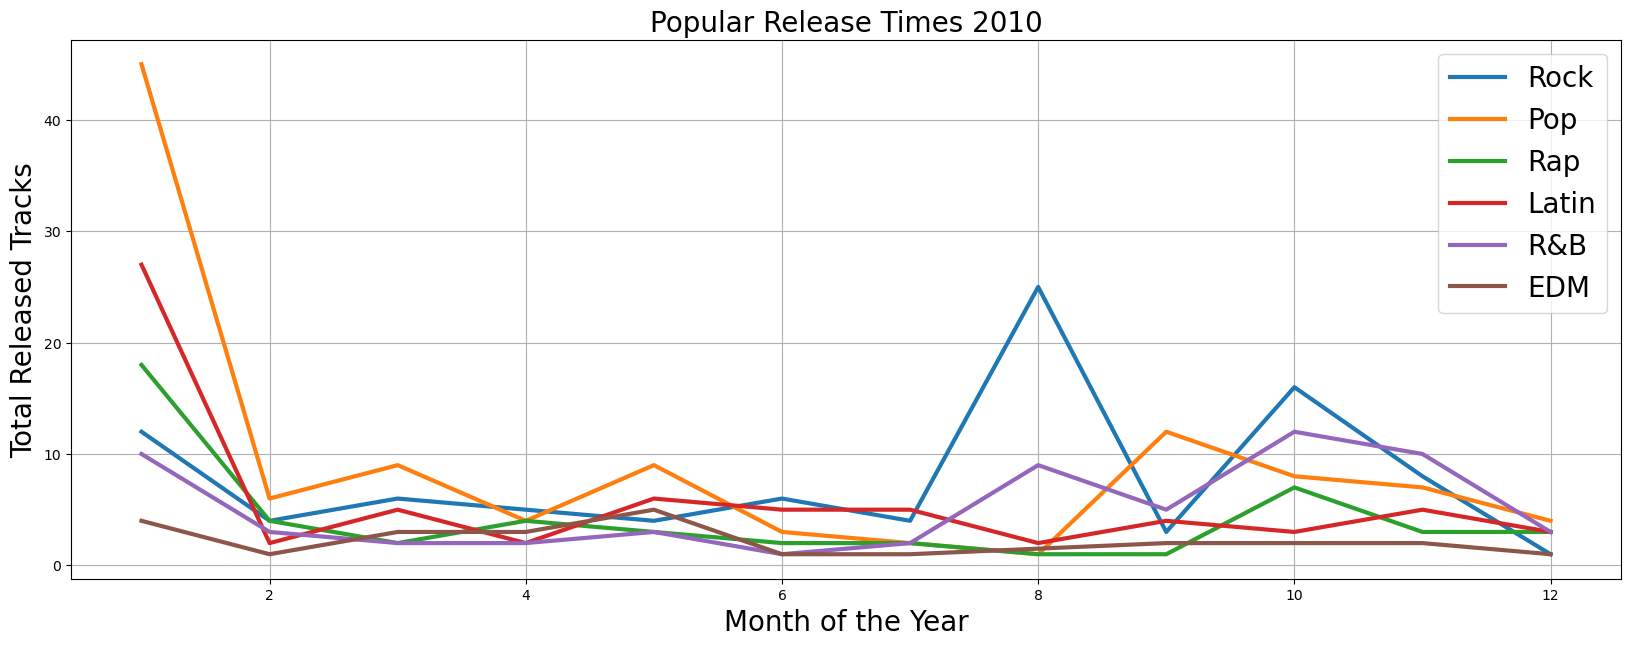

In [48]:

rock_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "rock") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2010)]
pop_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "pop") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2010)]
rap_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "rap") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2010)]
latin_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "latin") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2010)]
rnb_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "r&b") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2010)]
edm_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "edm") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2010)]

rock_data_2010 = rock_2010_df.groupby(rock_2010_df["track_album_release_date"].dt.month)["track_id"].size()
pop_data_2010 = pop_2010_df.groupby(pop_2010_df["track_album_release_date"].dt.month)["track_id"].size()
rap_data_2010 = rap_2010_df.groupby(rap_2010_df["track_album_release_date"].dt.month)["track_id"].size()
latin_data_2010 = latin_2010_df.groupby(latin_2010_df["track_album_release_date"].dt.month)["track_id"].size()
rnb_data_2010 = rnb_2010_df.groupby(rnb_2010_df["track_album_release_date"].dt.month)["track_id"].size()
edm_data_2010 = edm_2010_df.groupby(edm_2010_df["track_album_release_date"].dt.month)["track_id"].size()

plt.figure(figsize=(20,7))

plt.plot(rock_data_2010, linewidth = 3, label = "Rock")
plt.plot(pop_data_2010, linewidth = 3, label = "Pop")
plt.plot(rap_data_2010, linewidth = 3, label = "Rap")
plt.plot(latin_data_2010, linewidth = 3, label = "Latin")
plt.plot(rnb_data_2010, linewidth = 3, label = "R&B")
plt.plot(edm_data_2010, linewidth = 3, label = "EDM")


plt.xlabel("Month of the Year", fontsize = 20)
plt.ylabel("Total Released Tracks", fontsize = 20)
plt.title("Popular Release Times 2010", fontsize = 20)

plt.grid()

plt.legend(loc='best', fontsize="20")

plt.show()



     
        
    

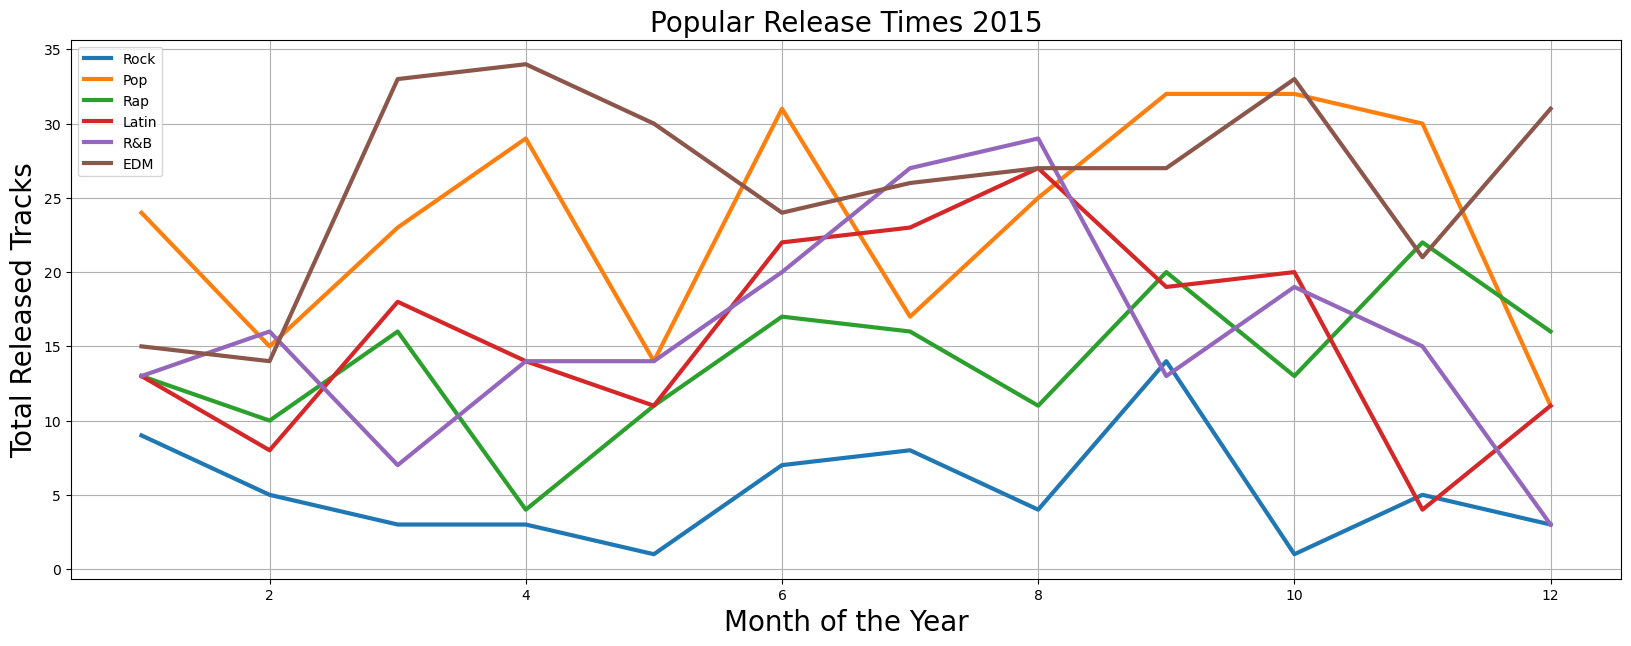

In [49]:

rock_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "rock") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2015)]
pop_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "pop") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2015)]
rap_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "rap") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2015)]
latin_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "latin") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2015)]
rnb_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "r&b") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2015)]
edm_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "edm") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2015)]

rock_data_2015 = rock_2015_df.groupby(rock_2015_df["track_album_release_date"].dt.month)["track_id"].size()
pop_data_2015 = pop_2015_df.groupby(pop_2015_df["track_album_release_date"].dt.month)["track_id"].size()
rap_data_2015 = rap_2015_df.groupby(rap_2015_df["track_album_release_date"].dt.month)["track_id"].size()
latin_data_2015 = latin_2015_df.groupby(latin_2015_df["track_album_release_date"].dt.month)["track_id"].size()
rnb_data_2015 = rnb_2015_df.groupby(rnb_2015_df["track_album_release_date"].dt.month)["track_id"].size()
edm_data_2015 = edm_2015_df.groupby(edm_2015_df["track_album_release_date"].dt.month)["track_id"].size()

plt.figure(figsize=(20,7))

plt.plot(rock_data_2015, linewidth = 3, label = "Rock")
plt.plot(pop_data_2015, linewidth = 3, label = "Pop")
plt.plot(rap_data_2015, linewidth = 3, label = "Rap")
plt.plot(latin_data_2015, linewidth = 3, label = "Latin")
plt.plot(rnb_data_2015, linewidth = 3, label = "R&B")
plt.plot(edm_data_2015, linewidth = 3, label = "EDM")


plt.xlabel("Month of the Year", fontsize = 20)
plt.ylabel("Total Released Tracks", fontsize = 20)
plt.title("Popular Release Times 2015", fontsize = 20)

plt.grid()

plt.legend(loc='best', fontsize="10")

plt.show()



     
        
    

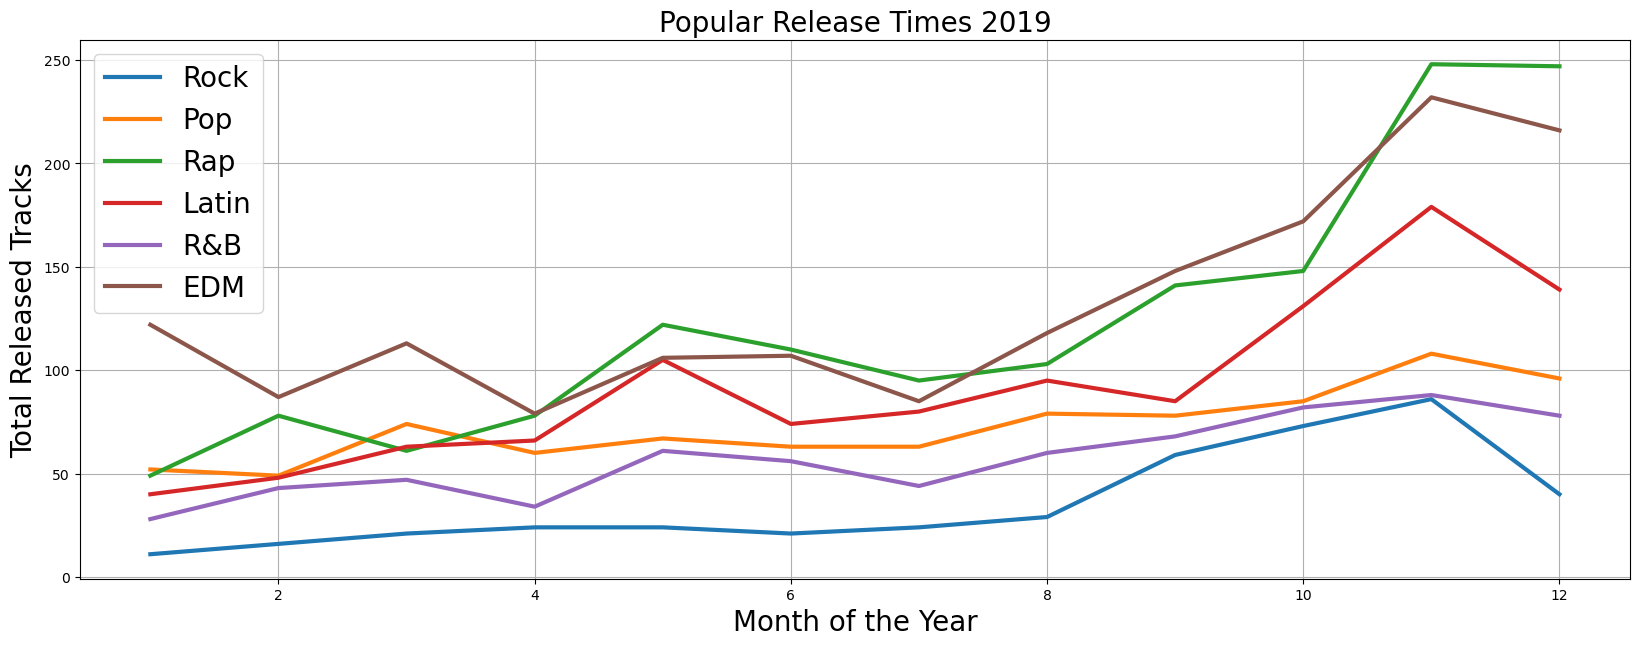

In [50]:

rock_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "rock") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2019)]
pop_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "pop") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2019)]
rap_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "rap") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2019)]
latin_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "latin") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2019)]
rnb_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "r&b") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2019)]
edm_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["playlist_genre"] == "edm") & (cleaned_trackid_data["track_album_release_date"].dt.year == 2019)]

rock_data_2019 = rock_2019_df.groupby(rock_2019_df["track_album_release_date"].dt.month)["track_id"].size()
pop_data_2019 = pop_2019_df.groupby(pop_2019_df["track_album_release_date"].dt.month)["track_id"].size()
rap_data_2019 = rap_2019_df.groupby(rap_2019_df["track_album_release_date"].dt.month)["track_id"].size()
latin_data_2019 = latin_2019_df.groupby(latin_2019_df["track_album_release_date"].dt.month)["track_id"].size()
rnb_data_2019 = rnb_2019_df.groupby(rnb_2019_df["track_album_release_date"].dt.month)["track_id"].size()
edm_data_2019 = edm_2019_df.groupby(edm_2019_df["track_album_release_date"].dt.month)["track_id"].size()

plt.figure(figsize=(20,7))

plt.plot(rock_data_2019, linewidth = 3, label = "Rock")
plt.plot(pop_data_2019, linewidth = 3, label = "Pop")
plt.plot(rap_data_2019, linewidth = 3, label = "Rap")
plt.plot(latin_data_2019, linewidth = 3, label = "Latin")
plt.plot(rnb_data_2019, linewidth = 3, label = "R&B")
plt.plot(edm_data_2019, linewidth = 3, label = "EDM")


plt.xlabel("Month of the Year", fontsize = 20)
plt.ylabel("Total Released Tracks", fontsize = 20)
plt.title("Popular Release Times 2019", fontsize = 20)

plt.grid()

plt.legend(loc='best', fontsize="20")

plt.show()



     
        
    

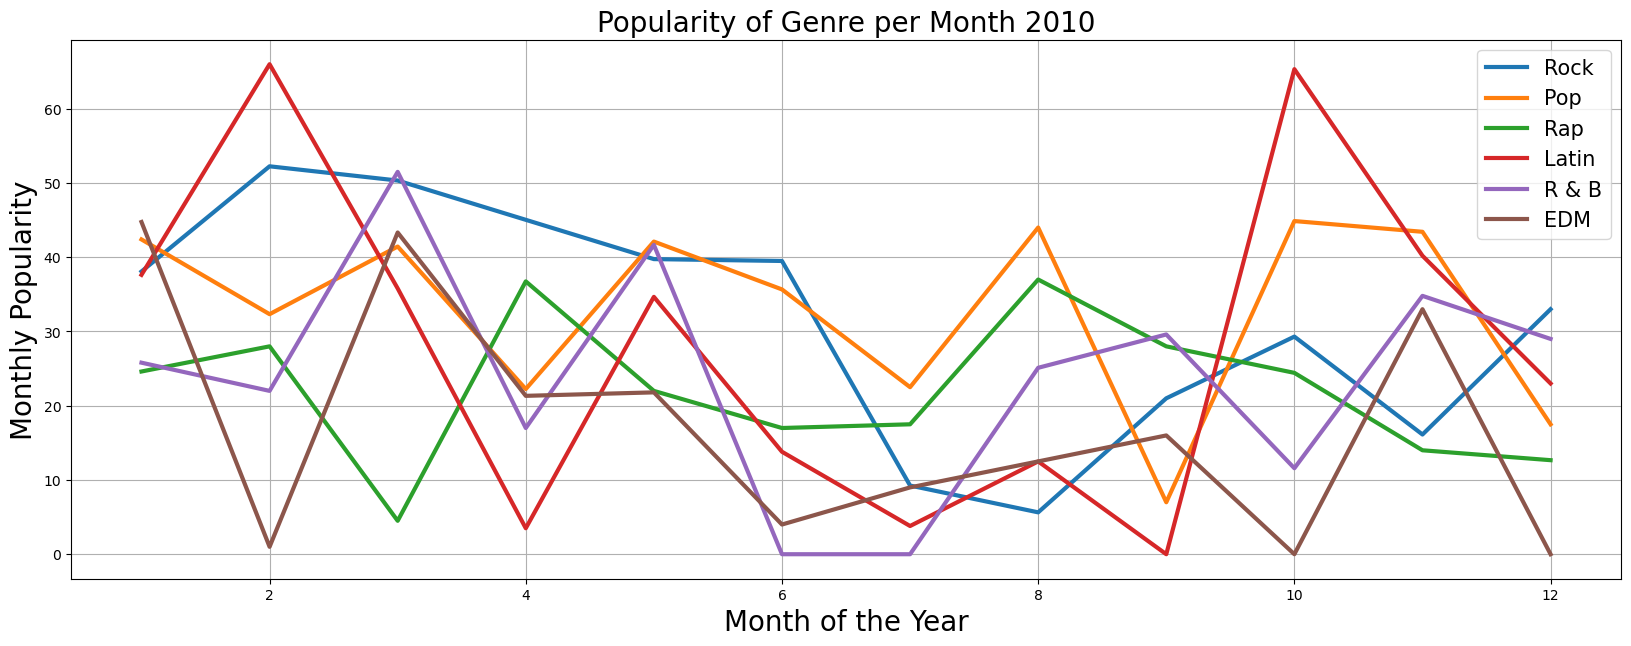

In [51]:

rock_popularity_data_2010 = rock_2010_df.groupby(rock_2010_df["track_album_release_date"].dt.month)["track_popularity"].mean()
pop_popularity_data_2010 = pop_2010_df.groupby(pop_2010_df["track_album_release_date"].dt.month)["track_popularity"].mean()
rap_popularity_data_2010 = rap_2010_df.groupby(rap_2010_df["track_album_release_date"].dt.month)["track_popularity"].mean()
latin_popularity_data_2010 = latin_2010_df.groupby(latin_2010_df["track_album_release_date"].dt.month)["track_popularity"].mean()
rnb_popularity_data_2010 = rnb_2010_df.groupby(rnb_2010_df["track_album_release_date"].dt.month)["track_popularity"].mean()
edm_popularity_data_2010 = edm_2010_df.groupby(edm_2010_df["track_album_release_date"].dt.month)["track_popularity"].mean()

plt.figure(figsize=(20,7))

plt.plot(rock_popularity_data_2010, linewidth = 3, label = "Rock")
plt.plot(pop_popularity_data_2010, linewidth = 3, label = "Pop")
plt.plot(rap_popularity_data_2010, linewidth = 3, label = "Rap")
plt.plot(latin_popularity_data_2010, linewidth = 3, label = "Latin")
plt.plot(rnb_popularity_data_2010, linewidth = 3, label = "R & B")
plt.plot(edm_popularity_data_2010, linewidth = 3, label = "EDM")

plt.xlabel("Month of the Year", fontsize = 20)
plt.ylabel("Monthly Popularity", fontsize = 20)
plt.title("Popularity of Genre per Month 2010", fontsize = 20)


plt.grid()

plt.legend(loc='best', fontsize="15")

plt.show()


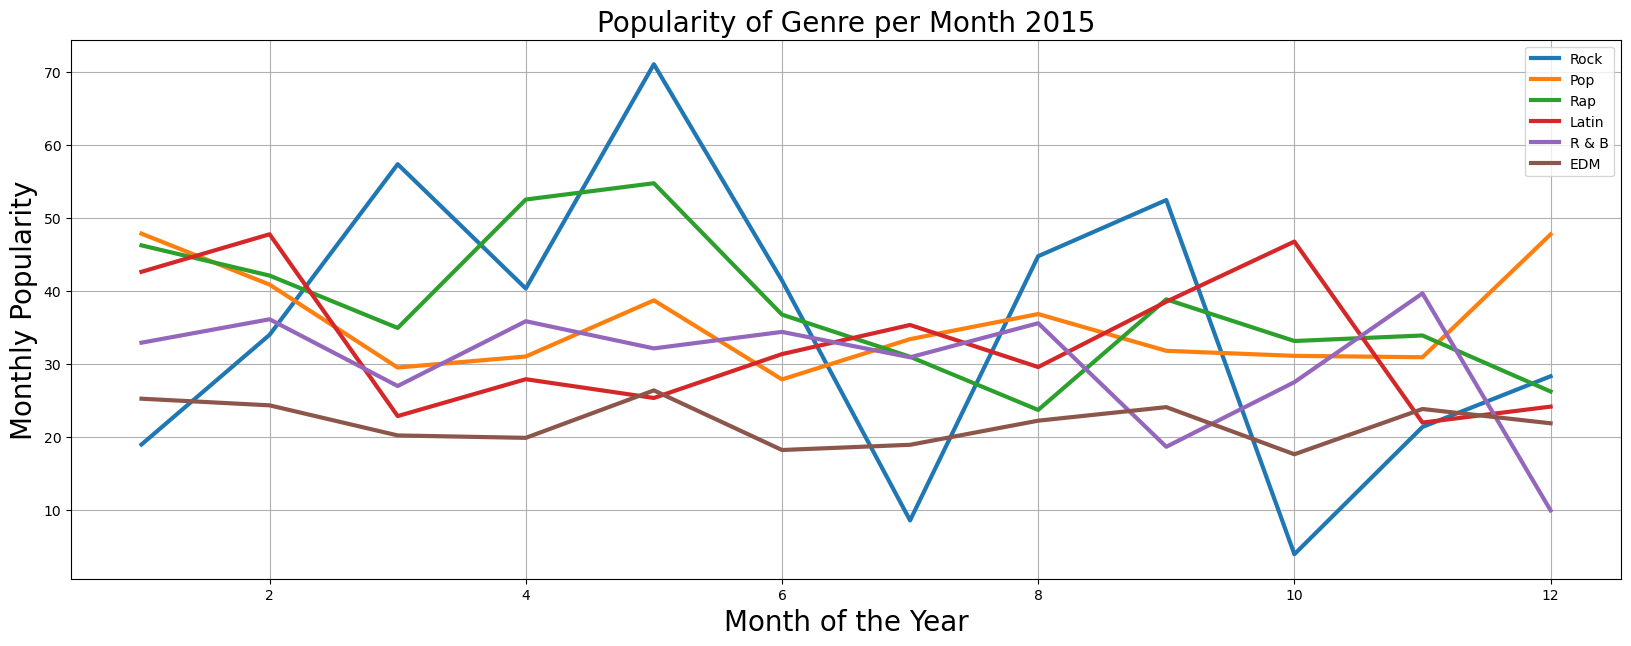

In [52]:

rock_popularity_data_2015 = rock_2015_df.groupby(rock_2015_df["track_album_release_date"].dt.month)["track_popularity"].mean()
pop_popularity_data_2015 = pop_2015_df.groupby(pop_2015_df["track_album_release_date"].dt.month)["track_popularity"].mean()
rap_popularity_data_2015 = rap_2015_df.groupby(rap_2015_df["track_album_release_date"].dt.month)["track_popularity"].mean()
latin_popularity_data_2015 = latin_2015_df.groupby(latin_2015_df["track_album_release_date"].dt.month)["track_popularity"].mean()
rnb_popularity_data_2015 = rnb_2015_df.groupby(rnb_2015_df["track_album_release_date"].dt.month)["track_popularity"].mean()
edm_popularity_data_2015 = edm_2015_df.groupby(edm_2015_df["track_album_release_date"].dt.month)["track_popularity"].mean()

plt.figure(figsize=(20,7))

plt.plot(rock_popularity_data_2015, linewidth = 3, label = "Rock")
plt.plot(pop_popularity_data_2015, linewidth = 3, label = "Pop")
plt.plot(rap_popularity_data_2015, linewidth = 3, label = "Rap")
plt.plot(latin_popularity_data_2015, linewidth = 3, label = "Latin")
plt.plot(rnb_popularity_data_2015, linewidth = 3, label = "R & B")
plt.plot(edm_popularity_data_2015, linewidth = 3, label = "EDM")

plt.xlabel("Month of the Year", fontsize = 20)
plt.ylabel("Monthly Popularity", fontsize = 20)
plt.title("Popularity of Genre per Month 2015", fontsize = 20)

plt.grid()

plt.legend(loc='best', fontsize="10")

plt.show()


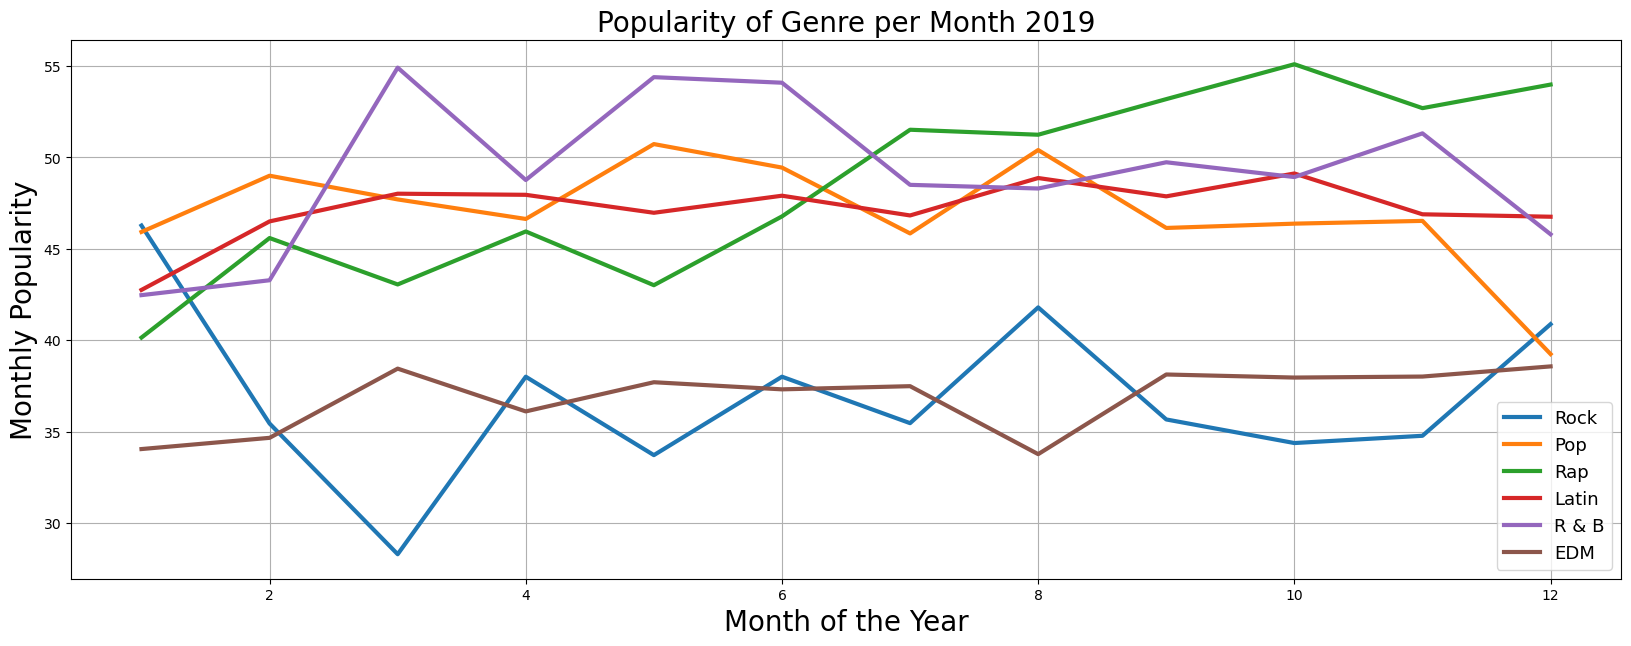

In [53]:

rock_popularity_data_2019 = rock_2019_df.groupby(rock_2019_df["track_album_release_date"].dt.month)["track_popularity"].mean()
pop_popularity_data_2019 = pop_2019_df.groupby(pop_2019_df["track_album_release_date"].dt.month)["track_popularity"].mean()
rap_popularity_data_2019 = rap_2019_df.groupby(rap_2019_df["track_album_release_date"].dt.month)["track_popularity"].mean()
latin_popularity_data_2019 = latin_2019_df.groupby(latin_2019_df["track_album_release_date"].dt.month)["track_popularity"].mean()
rnb_popularity_data_2019 = rnb_2019_df.groupby(rnb_2019_df["track_album_release_date"].dt.month)["track_popularity"].mean()
edm_popularity_data_2019 = edm_2019_df.groupby(edm_2019_df["track_album_release_date"].dt.month)["track_popularity"].mean()

plt.figure(figsize=(20,7))

plt.plot(rock_popularity_data_2019, linewidth = 3, label = "Rock")
plt.plot(pop_popularity_data_2019, linewidth = 3, label = "Pop")
plt.plot(rap_popularity_data_2019, linewidth = 3, label = "Rap")
plt.plot(latin_popularity_data_2019, linewidth = 3, label = "Latin")
plt.plot(rnb_popularity_data_2019, linewidth = 3, label = "R & B")
plt.plot(edm_popularity_data_2019, linewidth = 3, label = "EDM")

plt.xlabel("Month of the Year", fontsize = 20)
plt.ylabel("Monthly Popularity", fontsize = 20)
plt.title("Popularity of Genre per Month 2019", fontsize = 20)

plt.grid()

plt.legend(loc='best', fontsize="13")

plt.show()


In [54]:
rock_correlation_2010 = round(st.pearsonr(rock_data_2010, rock_popularity_data_2010)[0],2)
rock_correlation_2015 = round(st.pearsonr(rock_data_2015, rock_popularity_data_2015)[0],2)
rock_correlation_2019 = round(st.pearsonr(rock_data_2019, rock_popularity_data_2019)[0],2)

rock_correlation_list = [rock_correlation_2010, rock_correlation_2015, rock_correlation_2019]

pop_correlation_2010 = round(st.pearsonr(pop_data_2010, pop_popularity_data_2010)[0],2)
pop_correlation_2015 = round(st.pearsonr(pop_data_2015, pop_popularity_data_2015)[0],2)
pop_correlation_2019 = round(st.pearsonr(pop_data_2019, pop_popularity_data_2019)[0],2)

pop_correlation_list = [pop_correlation_2010, pop_correlation_2015, pop_correlation_2019]

rap_correlation_2010 = round(st.pearsonr(rap_data_2010, rap_popularity_data_2010)[0],2)
rap_correlation_2015 = round(st.pearsonr(rap_data_2015, rap_popularity_data_2015)[0],2)
rap_correlation_2019 = round(st.pearsonr(rap_data_2019, rap_popularity_data_2019)[0],2)

rap_correlation_list = [rap_correlation_2010, rap_correlation_2015, rap_correlation_2019]

latin_correlation_2010 = round(st.pearsonr(latin_data_2010, latin_popularity_data_2010)[0],2)
latin_correlation_2015 = round(st.pearsonr(latin_data_2015, latin_popularity_data_2015)[0],2)
latin_correlation_2019 = round(st.pearsonr(latin_data_2019, latin_popularity_data_2019)[0],2)

latin_correlation_list = [latin_correlation_2010, latin_correlation_2015, latin_correlation_2019]

rnb_correlation_2010 = round(st.pearsonr(rnb_data_2010, rnb_popularity_data_2010)[0],2)
rnb_correlation_2015 = round(st.pearsonr(rnb_data_2015, rnb_popularity_data_2015)[0],2)
rnb_correlation_2019 = round(st.pearsonr(rnb_data_2019, rnb_popularity_data_2019)[0],2)

rnb_correlation_list = [rnb_correlation_2010, rnb_correlation_2015, rnb_correlation_2019]

edm_correlation_2010 = round(st.pearsonr(edm_data_2010, edm_popularity_data_2010)[0],2)
edm_correlation_2015 = round(st.pearsonr(edm_data_2015, edm_popularity_data_2015)[0],2)
edm_correlation_2019 = round(st.pearsonr(edm_data_2019, edm_popularity_data_2019)[0],2)

edm_correlation_list = [edm_correlation_2010, edm_correlation_2015, edm_correlation_2019]



In [55]:
index_years = pd.Series(["2010", "2015", "2019"])

pd.DataFrame({"Rock": rock_correlation_list,
              "Pop": pop_correlation_list,
              "Rap": rap_correlation_list,
              "Latin": latin_correlation_list,
              "R&B": rnb_correlation_list,
              "EDM": edm_correlation_list}).set_index([index_years])
    

,Rock,Pop,Rap,Latin,R&B,EDM
2010,-0.42,0.20,0.10,0.11,0.07,0.67
2015,-0.06,-0.67,-0.48,0.14,0.56,-0.49
2019,-0.24,-0.41,0.71,0.32,0.29,0.45
